## Loading the Images

In [1]:
#Loading Libraries
import numpy as np 
import pandas as pd
import numpy as np
import os
import imutils
import dlib 
import cv2 
import imageio
from imutils import face_utils

In [2]:
people = ['F01','F02','F04','F05','F06','F07','F08','F09', 'F10','F11','M01','M02','M04','M07','M08']
data_types = ['words']
folder_enum = ['01','02','03','04','05','06','07','08','09','10']
instances = ['01','02','03','04','05','06','07','08','09','10']

words = ['Begin', 'Choose', 'Connection', 'Navigation', 'Next', 'Previous', 'Start', 'Stop', 'Hello', 'Web']          
words_di = {i:words[i] for i in range(len(words))}

In [3]:
os.listdir('D:/Lipreading/concatenated_images(5x5)')

['F01',
 'F02',
 'F04',
 'F05',
 'F06',
 'F07',
 'F08',
 'F09',
 'F10',
 'F11',
 'M01',
 'M02',
 'M04',
 'M07',
 'M08']

In [4]:
from skimage.transform import resize
import time

In [5]:
import os
import time
import imageio
import numpy as np
from skimage.transform import resize

# Define constants
MAX_WIDTH = 100
MAX_HEIGHT = 100
#max_seq_length = 40  # Updated to match the desired sequence length

t1 = time.time()

#UNSEEN_VALIDATION_SPLIT = ['F07', 'M02']
UNSEEN_TEST_SPLIT = ['F04','F07', 'M01']

# people1 = ['F01', 'F02', 'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'F10', 'F11', 'M01', 'M02', 'M04', 'M07', 'M08']
# data_types1 = ['words']
# folder_enum1 = ['01', '02', '03', '04', '05']

X_train, X_test = [], []
y_train, y_test = [], []

directory = "./concatenated_images(5x5)"

for person_id in people:
    tx1 = time.time()
    for data_type in data_types:
        for word_index, word in enumerate(folder_enum):
            print(f"Word : '{words[word_index]}'")
            path = os.path.join(directory, person_id, data_type, word)
            filelist = sorted(os.listdir(path + '/'))
            sequence = []
            print(filelist)
            for img_name in filelist:
                image = imageio.imread(path + '/' + img_name)
                image = resize(image, (MAX_WIDTH, MAX_HEIGHT))
                image = 255 * image
                # Convert to integer data type pixels.
                image = image.astype(np.uint8)
                sequence = image
            # pad_array = [np.zeros((MAX_WIDTH, MAX_HEIGHT))] #* (max_seq_length - len(sequence))
            # sequence.extend(pad_array)  # * (max_seq_length - len(sequence)))
            # # sequence = np.array(sequence)
                if person_id in UNSEEN_TEST_SPLIT:
                    X_test.append(sequence)
                    y_test.append(word_index)
                else:
                    X_train.append(sequence)
                    y_train.append(word_index)
    tx2 = time.time()
    print(f'Finished reading images for person {person_id}. Time taken : {tx2 - tx1} secs.')

t2 = time.time()
print(f"Time taken for creating constant size 3D Tensors from those concatenated lip images : {t2 - t1} secs.")

Word : 'Begin'
['01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg', '09.jpg', '10.jpg']


C:\Users\satvi\AppData\Local\Temp\ipykernel_17140\1648399812.py:36: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(path + '/' + img_name)


Word : 'Choose'
['01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg', '09.jpg', '10.jpg']
Word : 'Connection'
['01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg', '09.jpg', '10.jpg']
Word : 'Navigation'
['01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg', '09.jpg', '10.jpg']
Word : 'Next'
['01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg', '09.jpg', '10.jpg']
Word : 'Previous'
['01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg', '09.jpg', '10.jpg']
Word : 'Start'
['01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg', '09.jpg', '10.jpg']
Word : 'Stop'
['01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg', '09.jpg', '10.jpg']
Word : 'Hello'
['01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jpg', '06.jpg', '07.jpg', '08.jpg', '09.jpg', '10.jpg']
Word : 'Web'
['01.jpg', '02.jpg', '03.jpg', '04.jpg', '05.jp

In [6]:
X_train = np.array(X_train)
X_test = np.array(X_test)

In [7]:
print(X_train.shape)
print(X_test.shape)

(1200, 100, 100)
(300, 100, 100)


In [8]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [9]:
print(y_train.shape)
print(y_test.shape)
print(y_test)

(1200,)
(300,)
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7
 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4
 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8
 8 8 8 8 8 9 9 9 9 9 9 9 9 9 9 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5
 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9
 9 9 9 9]


In [10]:
def normalize_it(X):
    v_min = X.min(axis=(1, 2), keepdims=True)
    v_max = X.max(axis=(1, 2), keepdims=True)

    # Calculate the range and replace zero values with epsilon to avoid division by zero
    range_values = np.where((v_max - v_min) == 0, np.finfo(float).eps, v_max - v_min)

    # Normalize the data
    X_normalized = np.where(range_values == 0, 0, (X - v_min) / range_values)

    return X_normalized

In [11]:
from keras.utils import to_categorical


In [12]:
X_train = normalize_it(X_train)
X_test = normalize_it(X_test)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=0)
X_test, y_test = shuffle(X_test, y_test, random_state=0)

In [13]:
print(y_test)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [14]:
X_train = np.expand_dims(X_train, axis=3)
X_test = np.expand_dims(X_test, axis=3)

In [15]:
print(X_train.shape)
print(X_test.shape)

(1200, 100, 100, 1)
(300, 100, 100, 1)


In [16]:
print(y_train.shape)
print(y_test.shape)
print(y_test)

(1200, 10)
(300, 10)
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [17]:
df = pd.DataFrame(y_test)
# Display the entire matrix
print(df)

       0    1    2    3    4    5    6    7    8    9
0    1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
1    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
2    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
3    0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
4    0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
295  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
296  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
297  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
298  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
299  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0

[300 rows x 10 columns]


## Resnet-50+SVM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist # Example dataset
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, Add
from tensorflow.keras.models import Model
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the Residual Block
def residual_block(input_tensor, filters, strides=(1, 1)):
    shortcut = input_tensor

    # First convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(input_tensor)
    x = Activation('relu')(x)

    # Second convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)

    # If dimensions change, adjust shortcut
    if strides != (1, 1) or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='valid')(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# Define the ResNet model without the last layer
def create_resnet_base(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (7, 7), strides=2, activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Residual blocks
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=128, strides=(2, 2))
    x = residual_block(x, filters=128)
    x = residual_block(x, filters=256, strides=(2, 2))
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=512, strides=(2, 2))
    x = residual_block(x, filters=512)

    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the ResNet base model
resnet_base_model = create_resnet_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = resnet_base_model.predict(X_train)
X_test_features = resnet_base_model.predict(X_test)

# Train SVM classifier
svm_classifier = SVC(kernel='linear')
pipeline1 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_classifier", svm_classifier)
])
pipeline1.fit(X_train_features, np.argmax(y_train, axis=1))

# Evaluate performance on training set
y_train_pred = pipeline1.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline1.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_score = pipeline1.decision_function(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

# Assume X_train, X_test, y_train, y_test are already defined as follows:
# X_train.shape -> (1200, 100, 100, 1)
# X_test.shape -> (300, 100, 100, 1)
# y_train.shape -> (1200, 10)
# y_test.shape -> (300, 10)

# Split the training data to include a validation set
X_train_part, X_val, y_train_part, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the Residual Block (as given earlier)
def residual_block(input_tensor, filters, strides=(1, 1)):
    shortcut = input_tensor

    # First convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(input_tensor)
    x = Activation('relu')(x)

    # Second convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)

    # If dimensions change, adjust shortcut
    if strides != (1, 1) or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='valid')(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# Define the ResNet model with the final dense layer for classification
def create_resnet_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (7, 7), strides=2, activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Residual blocks
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=128, strides=(2, 2))
    x = residual_block(x, filters=128)
    x = residual_block(x, filters=256, strides=(2, 2))
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=512, strides=(2, 2))
    x = residual_block(x, filters=512)

    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=inputs, outputs=outputs)
    return model

# Create the ResNet model
resnet_model = create_resnet_model(input_shape=(100, 100, 1), num_classes=10)

# Compile the model
resnet_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Early Stopping callback
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = resnet_model.fit(
    X_train_part, y_train_part,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping_callback]
)

# Extract features using the trained ResNet model
resnet_base_model = Model(inputs=resnet_model.input, outputs=resnet_model.layers[-3].output)  # Layer before the dense layer

X_train_features = resnet_base_model.predict(X_train)
X_test_features = resnet_base_model.predict(X_test)

# Train SVM classifier
svm_classifier = SVC(kernel='linear')
pipeline1 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_classifier", svm_classifier)
])
pipeline1.fit(X_train_features, np.argmax(y_train, axis=1))

# Evaluate performance on training set
y_train_pred = pipeline1.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100, '%')
print("Training Precision:", train_precision*100, '%')
print("Training Recall:", train_recall*100, '%')
print("Training F1 Score:", train_f1*100, '%')

# Evaluate performance on testing set
y_test_pred = pipeline1.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100, '%')
print("Testing Precision:", test_precision*100, '%')
print("Testing Recall:", test_recall*100, '%')
print("Testing F1 Score:", test_f1*100, '%')

# ROC curve
y_score = pipeline1.decision_function(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


## Resnet + Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, Add
from tensorflow.keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the Residual Block
def residual_block(input_tensor, filters, strides=(1, 1)):
    shortcut = input_tensor

    # First convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(input_tensor)
    x = Activation('relu')(x)

    # Second convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)

    # If dimensions change, adjust shortcut
    if strides != (1, 1) or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='valid')(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# Define the ResNet model without the last layer
def create_resnet_base(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (7, 7), strides=2, activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Residual blocks
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=128, strides=(2, 2))
    x = residual_block(x, filters=128)
    x = residual_block(x, filters=256, strides=(2, 2))
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=512, strides=(2, 2))
    x = residual_block(x, filters=512)

    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the ResNet base model
resnet_base_model = create_resnet_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = resnet_base_model.predict(X_train)
X_test_features = resnet_base_model.predict(X_test)

# Train Random Forest classifier
random_forest_classifier24 = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)
pipeline24 = Pipeline([
    ("scaler", StandardScaler()),
    ("random_forest_classifier", random_forest_classifier24)
])
pipeline24.fit(X_train_features, np.argmax(y_train, axis=1))


# Evaluate performance on training set
y_train_pred = pipeline24.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline24.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_score = pipeline24.predict_proba(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Find the dimensionality of the features vector
features_dimensionality = X_train_features.shape
print("Dimensionality of the features vector:", features_dimensionality)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Add, Activation
from tensorflow.keras.models import Model

# Define the Residual Block
def residual_block(input_tensor, filters, strides=(1, 1)):
    shortcut = input_tensor

    # First convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(input_tensor)
    x = Activation('relu')(x)

    # Second convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)

    # If dimensions change, adjust shortcut
    if strides != (1, 1) or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='valid')(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# Define the ResNet model without the last layer
def create_resnet_base(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (7, 7), strides=2, activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Residual blocks
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=128, strides=(2, 2))
    x = residual_block(x, filters=128)
    x = residual_block(x, filters=256, strides=(2, 2))
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=512, strides=(2, 2))
    x = residual_block(x, filters=512)

    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create synthetic data for demonstration
X_train, X_test = np.random.rand(100, 100, 100, 1), np.random.rand(20, 100, 100, 1)
y_train, y_test = np.random.randint(0, 2, size=(100,)), np.random.randint(0, 2, size=(20,))

# Create the ResNet base model
resnet_base_model = create_resnet_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = resnet_base_model.predict(X_train)
X_test_features = resnet_base_model.predict(X_test)

# Perform PCA to reduce dimensionality
pca = PCA(n_components=100)  # You can adjust the number of components as needed
X_train_features_pca = pca.fit_transform(X_train_features)
X_test_features_pca = pca.transform(X_test_features)

# Train Random Forest classifier on PCA-transformed features
random_forest_classifier_pca = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)
pipeline_pca = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA()),  # You can specify the number of components here if needed
    ("random_forest_classifier", random_forest_classifier_pca)
])
pipeline_pca.fit(X_train_features_pca, y_train)

# Evaluate performance on training set with PCA
y_train_pred_pca = pipeline_pca.predict(X_train_features_pca)
train_accuracy_pca = accuracy_score(y_train, y_train_pred_pca)
train_precision_pca = precision_score(y_train, y_train_pred_pca, average='weighted')
train_recall_pca = recall_score(y_train, y_train_pred_pca, average='weighted')
train_f1_pca = f1_score(y_train, y_train_pred_pca, average='weighted')

print("Training Accuracy (with PCA):", train_accuracy_pca * 100,'%')
print("Training Precision (with PCA):", train_precision_pca * 100,'%')
print("Training Recall (with PCA):", train_recall_pca * 100,'%')
print("Training F1 Score (with PCA):", train_f1_pca * 100,'%')

# Evaluate performance on testing set with PCA
y_test_pred_pca = pipeline_pca.predict(X_test_features_pca)
test_accuracy_pca = accuracy_score(y_test, y_test_pred_pca)
test_precision_pca = precision_score(y_test, y_test_pred_pca, average='weighted')
test_recall_pca = recall_score(y_test, y_test_pred_pca, average='weighted')
test_f1_pca = f1_score(y_test, y_test_pred_pca, average='weighted')

print("Testing Accuracy (with PCA):", test_accuracy_pca * 100,'%')
print("Testing Precision (with PCA):", test_precision_pca * 100,'%')
print("Testing Recall (with PCA):", test_recall_pca * 100,'%')
print("Testing F1 Score (with PCA):", test_f1_pca * 100,'%')


In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve for testing set
y_score_pca = pipeline_pca.predict_proba(X_test_features_pca)
fpr_pca, tpr_pca, _ = roc_curve(y_test, y_score_pca[:, 1])  # Considering only the positive class
roc_auc_pca = auc(fpr_pca, tpr_pca)

# Plot ROC curve
plt.figure()
plt.plot(fpr_pca, tpr_pca, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_pca)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Find the dimensionality of the features vector
features_dimensionality = X_train_features.shape
print("Dimensionality of the features vector:", features_dimensionality)


In [ ]:
import joblib

model_path = "appliedpca(resnet+rf)/resnet_base_model.h5"
classifier_path = "appliedpca(resnet+rf)/random_forest_classifier_pca.pkl"

# Save the ResNet base model
resnet_base_model.save(model_path)

# Save the SVM classifier
joblib.dump(pipeline_pca, classifier_path)

## Inception-v3 + Random forest

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, concatenate, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Define the Inception module
def inception_module(x, filters):
    branch1x1 = Conv2D(filters=filters[0], kernel_size=(1, 1), padding='same', activation='relu')(x)

    branch3x3 = Conv2D(filters=filters[1], kernel_size=(1, 1), padding='same', activation='relu')(x)
    branch3x3 = Conv2D(filters=filters[2], kernel_size=(3, 3), padding='same', activation='relu')(branch3x3)

    branch5x5 = Conv2D(filters=filters[3], kernel_size=(1, 1), padding='same', activation='relu')(x)
    branch5x5 = Conv2D(filters=filters[4], kernel_size=(5, 5), padding='same', activation='relu')(branch5x5)

    branch_pool = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = Conv2D(filters=filters[5], kernel_size=(1, 1), padding='same', activation='relu')(branch_pool)

    output = concatenate([branch1x1, branch3x3, branch5x5, branch_pool], axis=-1)
    return output

# Define the Inception-V3 model without the last layer
def create_inception_v3_base(input_shape):
    inputs = Input(shape=input_shape)

    # Initial convolutional layer
    x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Inception blocks
    x = inception_module(x, filters=[64, 96, 128, 16, 32, 32])
    x = inception_module(x, filters=[128, 128, 192, 32, 96, 64])
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Flatten and fully connected layers
    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the Inception-V3 base model
inception_v3_base_model = create_inception_v3_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = inception_v3_base_model.predict(X_train)
X_test_features = inception_v3_base_model.predict(X_test)

# Train Random Forest classifier
random_forest_classifier23 = RandomForestClassifier(n_estimators=400, max_depth=30, random_state=42)
pipeline23 = Pipeline([
    ("scaler", StandardScaler()),
    ("random_forest_classifier", random_forest_classifier23)
])
pipeline23.fit(X_train_features, np.argmax(y_train, axis=1))


# Evaluate performance on training set
y_train_pred = pipeline23.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline23.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_score = pipeline23.predict_proba(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Find the dimensionality of the features vector
features_dimensionality = X_train_features.shape
print("Dimensionality of the features vector:", features_dimensionality)


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, concatenate, Flatten, Dense
from tensorflow.keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Define the Inception module
def inception_module(x, filters):
    branch1x1 = Conv2D(filters=filters[0], kernel_size=(1, 1), padding='same', activation='relu')(x)

    branch3x3 = Conv2D(filters=filters[1], kernel_size=(1, 1), padding='same', activation='relu')(x)
    branch3x3 = Conv2D(filters=filters[2], kernel_size=(3, 3), padding='same', activation='relu')(branch3x3)

    branch5x5 = Conv2D(filters=filters[3], kernel_size=(1, 1), padding='same', activation='relu')(x)
    branch5x5 = Conv2D(filters=filters[4], kernel_size=(5, 5), padding='same', activation='relu')(branch5x5)

    branch_pool = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = Conv2D(filters=filters[5], kernel_size=(1, 1), padding='same', activation='relu')(branch_pool)

    output = concatenate([branch1x1, branch3x3, branch5x5, branch_pool], axis=-1)
    return output

# Define the Inception-V3 model without the last layer
def create_inception_v3_base(input_shape):
    inputs = Input(shape=input_shape)

    # Initial convolutional layer
    x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Inception blocks
    x = inception_module(x, filters=[64, 96, 128, 16, 32, 32])
    x = inception_module(x, filters=[128, 128, 192, 32, 96, 64])
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Flatten and fully connected layers
    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create synthetic data for demonstration
X_train, X_test = np.random.rand(100, 100, 100, 1), np.random.rand(20, 100, 100, 1)
y_train, y_test = np.random.randint(0, 2, size=(100,)), np.random.randint(0, 2, size=(20,))

# Create the Inception-V3 base model
inception_v3_base_model = create_inception_v3_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = inception_v3_base_model.predict(X_train)
X_test_features = inception_v3_base_model.predict(X_test)

# Perform PCA to reduce dimensionality
pca = PCA(n_components=100)  # You can adjust the number of components as needed
X_train_features_pca = pca.fit_transform(X_train_features)
X_test_features_pca = pca.transform(X_test_features)

# Train Random Forest classifier on PCA-transformed features
random_forest_classifier_pca = RandomForestClassifier(n_estimators=400, max_depth=30, random_state=42)
pipeline_pca = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA()),  # You can specify the number of components here if needed
    ("random_forest_classifier", random_forest_classifier_pca)
])
pipeline_pca.fit(X_train_features_pca, y_train)

# Evaluate performance on training set with PCA
y_train_pred_pca = pipeline_pca.predict(X_train_features_pca)
train_accuracy_pca = accuracy_score(y_train, y_train_pred_pca)
train_precision_pca = precision_score(y_train, y_train_pred_pca, average='weighted')
train_recall_pca = recall_score(y_train, y_train_pred_pca, average='weighted')
train_f1_pca = f1_score(y_train, y_train_pred_pca, average='weighted')

print("Training Accuracy (with PCA):", train_accuracy_pca * 100,'%')
print("Training Precision (with PCA):", train_precision_pca * 100,'%')
print("Training Recall (with PCA):", train_recall_pca * 100,'%')
print("Training F1 Score (with PCA):", train_f1_pca * 100,'%')

# Evaluate performance on testing set with PCA
y_test_pred_pca = pipeline_pca.predict(X_test_features_pca)
test_accuracy_pca = accuracy_score(y_test, y_test_pred_pca)
test_precision_pca = precision_score(y_test, y_test_pred_pca, average='weighted')
test_recall_pca = recall_score(y_test, y_test_pred_pca, average='weighted')
test_f1_pca = f1_score(y_test, y_test_pred_pca, average='weighted')

print("Testing Accuracy (with PCA):", test_accuracy_pca * 100,'%')
print("Testing Precision (with PCA):", test_precision_pca * 100,'%')
print("Testing Recall (with PCA):", test_recall_pca * 100,'%')
print("Testing F1 Score (with PCA):", test_f1_pca * 100,'%')

# Plot ROC curve
y_score_pca = pipeline_pca.predict_proba(X_test_features_pca)
fpr_pca, tpr_pca, _ = roc_curve(y_test, y_score_pca[:, 1])  # Considering only the positive class
roc_auc_pca = auc(fpr_pca, tpr_pca)

plt.figure()
plt.plot(fpr_pca, tpr_pca, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_pca)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Find the dimensionality of the features vector
features_dimensionality = X_train_features.shape
print("Dimensionality of the features vector:", features_dimensionality)


In [ ]:
import joblib

model_path = "appliedpca(inception-v3+rf)/inception_v3_base_model.h5"
classifier_path = "appliedpca(inception-v3+rf)/random_forest_classifier_pca"

# Save the ResNet base model
inception_v3_base_model.save(model_path)

# Save the SVM classifier
joblib.dump(pipeline_pca, classifier_path)

## Resnet-50+SVM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist # Example dataset
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, Add
from tensorflow.keras.models import Model
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the Residual Block
def residual_block(input_tensor, filters, strides=(1, 1)):
    shortcut = input_tensor

    # First convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(input_tensor)
    x = Activation('relu')(x)

    # Second convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)

    # If dimensions change, adjust shortcut
    if strides != (1, 1) or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='valid')(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# Define the ResNet model without the last layer
def create_resnet_base(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (7, 7), strides=2, activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Residual blocks
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=128, strides=(2, 2))
    x = residual_block(x, filters=128)
    x = residual_block(x, filters=256, strides=(2, 2))
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=512, strides=(2, 2))
    x = residual_block(x, filters=512)

    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the ResNet base model
resnet_base_model = create_resnet_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = resnet_base_model.predict(X_train)
X_test_features = resnet_base_model.predict(X_test)

# Train SVM classifier
svm_classifier = SVC(kernel='linear')
pipeline1 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_classifier", svm_classifier)
])
pipeline1.fit(X_train_features, np.argmax(y_train, axis=1))

# Evaluate performance on training set
y_train_pred = pipeline1.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline1.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

# ROC curve
y_score = pipeline1.decision_function(X_test_features)
fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())  # Flatten y_test and y_score
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Find the dimensionality of the features vector
features_dimensionality = X_train_features.shape
print("Dimensionality of the features vector:", features_dimensionality)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist # Example dataset
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, Add
from tensorflow.keras.models import Model
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Define the Residual Block
def residual_block(input_tensor, filters, strides=(1, 1)):
    shortcut = input_tensor

    # First convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(input_tensor)
    x = Activation('relu')(x)

    # Second convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)

    # If dimensions change, adjust shortcut
    if strides != (1, 1) or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='valid')(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# Define the ResNet model without the last layer
def create_resnet_base(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (7, 7), strides=2, activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Residual blocks
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=128, strides=(2, 2))
    x = residual_block(x, filters=128)
    x = residual_block(x, filters=256, strides=(2, 2))
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=512, strides=(2, 2))
    x = residual_block(x, filters=512)

    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model


# Create the ResNet base model
resnet_base_model = create_resnet_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = resnet_base_model.predict(X_train)
X_test_features = resnet_base_model.predict(X_test)

# Define the number of components for PCA
n_components = 100  # You can adjust this value as needed

# PCA transformer
pca = PCA(n_components=n_components)

# Modify the pipeline to include PCA
svm_classifier = SVC(kernel='linear', probability=True)
pipeline_with_pca = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", pca),
    ("svm_classifier", svm_classifier)
])

# Fit the pipeline with PCA on training data
pipeline_with_pca.fit(X_train_features, y_train)

# Evaluate performance on training set with PCA
y_train_pred_pca = pipeline_with_pca.predict(X_train_features)
train_accuracy_pca = accuracy_score(y_train, y_train_pred_pca)
train_precision_pca = precision_score(y_train, y_train_pred_pca, average='weighted')
train_recall_pca = recall_score(y_train, y_train_pred_pca, average='weighted')
train_f1_pca = f1_score(y_train, y_train_pred_pca, average='weighted')

print("Training Accuracy with PCA:", train_accuracy_pca*100,'%')
print("Training Precision with PCA:", train_precision_pca*100,'%')
print("Training Recall with PCA:", train_recall_pca*100,'%')
print("Training F1 Score with PCA:", train_f1_pca*100,'%')

# Evaluate performance on testing set with PCA
y_test_pred_pca = pipeline_with_pca.predict(X_test_features)
test_accuracy_pca = accuracy_score(y_test, y_test_pred_pca)
test_precision_pca = precision_score(y_test, y_test_pred_pca, average='weighted')
test_recall_pca = recall_score(y_test, y_test_pred_pca, average='weighted')
test_f1_pca = f1_score(y_test, y_test_pred_pca, average='weighted')

print("Testing Accuracy with PCA:", test_accuracy_pca*100,'%')
print("Testing Precision with PCA:", test_precision_pca*100,'%')
print("Testing Recall with PCA:", test_recall_pca*100,'%')
print("Testing F1 Score with PCA:", test_f1_pca*100,'%')

# ROC curve
y_score_pca = pipeline_with_pca.predict_proba(X_test_features)
fpr_pca, tpr_pca, _ = roc_curve(y_test.ravel(), y_score_pca.ravel())  # Flatten y_test and y_score
roc_auc_pca = auc(fpr_pca, tpr_pca)

plt.figure()
plt.plot(fpr_pca, tpr_pca, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_pca)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic with PCA')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Find the dimensionality of the features vector
features_dimensionality = X_train_features.shape
print("Dimensionality of the features vector:", features_dimensionality)


## LDR for Resnet+Random Forest

In [ ]:
import numpy as np
from skimage.transform import resize
import os
import time
import imageio
from imutils import face_utils
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from keras.utils import to_categorical
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Add, Activation
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Define the Residual Block
def residual_block(input_tensor, filters, strides=(1, 1)):
    shortcut = input_tensor

    # First convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(input_tensor)
    x = Activation('relu')(x)

    # Second convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)

    # If dimensions change, adjust shortcut
    if strides != (1, 1) or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='valid')(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# Define the ResNet model without the last layer
def create_resnet_base(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (7, 7), strides=2, activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Residual blocks
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=128, strides=(2, 2))
    x = residual_block(x, filters=128)
    x = residual_block(x, filters=256, strides=(2, 2))
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=512, strides=(2, 2))
    x = residual_block(x, filters=512)

    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create synthetic data for demonstration (you can replace this with actual data)
X_train, X_test = np.random.rand(100, 100, 100, 1), np.random.rand(20, 100, 100, 1)
y_train, y_test = np.random.randint(0, 2, size=(100,)), np.random.randint(0, 2, size=(20,))

# Create the ResNet base model
resnet_base_model = create_resnet_base(input_shape=(100, 100, 1))

# Extract features using ResNet base model
X_train_features = resnet_base_model.predict(X_train)
X_test_features = resnet_base_model.predict(X_test)

# Perform LDA to reduce dimensionality
lda = LDA(n_components=1)  # You can adjust the number of components as needed
X_train_features_lda = lda.fit_transform(X_train_features, y_train)
X_test_features_lda = lda.transform(X_test_features)

# Train Random Forest classifier on LDA-transformed features
random_forest_classifier_lda = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)
pipeline_lda = Pipeline([
    ("scaler", StandardScaler()),
    ("lda", LDA()),  # You can specify the number of components here if needed
    ("random_forest_classifier", random_forest_classifier_lda)
])
pipeline_lda.fit(X_train_features_lda, y_train)

# Evaluate performance on training set with LDA
y_train_pred_lda = pipeline_lda.predict(X_train_features_lda)
train_accuracy_lda = accuracy_score(y_train, y_train_pred_lda)
train_precision_lda = precision_score(y_train, y_train_pred_lda, average='weighted')
train_recall_lda = recall_score(y_train, y_train_pred_lda, average='weighted')
train_f1_lda = f1_score(y_train, y_train_pred_lda, average='weighted')

print("Training Accuracy (with LDA):", train_accuracy_lda * 100,'%')
print("Training Precision (with LDA):", train_precision_lda * 100,'%')
print("Training Recall (with LDA):", train_recall_lda * 100,'%')
print("Training F1 Score (with LDA):", train_f1_lda * 100,'%')

# Evaluate performance on testing set with LDA
y_test_pred_lda = pipeline_lda.predict(X_test_features_lda)
test_accuracy_lda = accuracy_score(y_test, y_test_pred_lda)
test_precision_lda = precision_score(y_test, y_test_pred_lda, average='weighted')
test_recall_lda = recall_score(y_test, y_test_pred_lda, average='weighted')
test_f1_lda = f1_score(y_test, y_test_pred_lda, average='weighted')

print("Testing Accuracy (with LDA):", test_accuracy_lda * 100,'%')
print("Testing Precision (with LDA):", test_precision_lda * 100,'%')
print("Testing Recall (with LDA):", test_recall_lda * 100,'%')
print("Testing F1 Score (with LDA):", test_f1_lda * 100,'%')

# Transform labels to binary format (for 2 classes)
y_train_binary = label_binarize(y_train, classes=[0, 1])
y_test_binary = label_binarize(y_test, classes=[0, 1])

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_binary.ravel(), y_test_pred_lda.ravel())
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import numpy as np
from skimage.transform import resize
import os
import time
import imageio
from imutils import face_utils
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from keras.utils import to_categorical
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Add, Activation
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Define the Residual Block
def residual_block(input_tensor, filters, strides=(1, 1)):
    shortcut = input_tensor

    # First convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(input_tensor)
    x = Activation('relu')(x)

    # Second convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)

    # If dimensions change, adjust shortcut
    if strides != (1, 1) or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='valid')(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# Define the ResNet model without the last layer
def create_resnet_base(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (7, 7), strides=2, activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Residual blocks
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=128, strides=(2, 2))
    x = residual_block(x, filters=128)
    x = residual_block(x, filters=256, strides=(2, 2))
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=512, strides=(2, 2))
    x = residual_block(x, filters=512)

    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create synthetic data for demonstration (you can replace this with actual data)
X_train, X_test = np.random.rand(100, 100, 100, 1), np.random.rand(20, 100, 100, 1)
y_train, y_test = np.random.randint(0, 2, size=(100,)), np.random.randint(0, 2, size=(20,))

# Create the ResNet base model
resnet_base_model = create_resnet_base(input_shape=(100, 100, 1))

# Extract features using ResNet base model
X_train_features = resnet_base_model.predict(X_train)
X_test_features = resnet_base_model.predict(X_test)

# Perform LDA to reduce dimensionality
lda = LDA(n_components=1)  # You can adjust the number of components as needed
X_train_features_lda = lda.fit_transform(X_train_features, y_train)
X_test_features_lda = lda.transform(X_test_features)

# Train Random Forest classifier on LDA-transformed features
random_forest_classifier_lda = RandomForestClassifier(n_estimators=300, max_depth=90, random_state=42)
pipeline_lda = Pipeline([
    ("scaler", StandardScaler()),
    ("lda", LDA()),  # You can specify the number of components here if needed
    ("random_forest_classifier", random_forest_classifier_lda)
])
pipeline_lda.fit(X_train_features_lda, y_train)

# Evaluate performance on training set with LDA
y_train_pred_lda = pipeline_lda.predict(X_train_features_lda)
train_accuracy_lda = accuracy_score(y_train, y_train_pred_lda)
train_precision_lda = precision_score(y_train, y_train_pred_lda, average='weighted')
train_recall_lda = recall_score(y_train, y_train_pred_lda, average='weighted')
train_f1_lda = f1_score(y_train, y_train_pred_lda, average='weighted')

print("Training Accuracy (with LDA):", train_accuracy_lda * 100,'%')
print("Training Precision (with LDA):", train_precision_lda * 100,'%')
print("Training Recall (with LDA):", train_recall_lda * 100,'%')
print("Training F1 Score (with LDA):", train_f1_lda * 100,'%')

# Evaluate performance on testing set with LDA
y_test_pred_lda = pipeline_lda.predict(X_test_features_lda)
test_accuracy_lda = accuracy_score(y_test, y_test_pred_lda)
test_precision_lda = precision_score(y_test, y_test_pred_lda, average='weighted')
test_recall_lda = recall_score(y_test, y_test_pred_lda, average='weighted')
test_f1_lda = f1_score(y_test, y_test_pred_lda, average='weighted')

print("Testing Accuracy (with LDA):", test_accuracy_lda * 100,'%')
print("Testing Precision (with LDA):", test_precision_lda * 100,'%')
print("Testing Recall (with LDA):", test_recall_lda * 100,'%')
print("Testing F1 Score (with LDA):", test_f1_lda * 100,'%')

# Transform labels to binary format (for 2 classes)
y_train_binary = label_binarize(y_train, classes=[0, 1])
y_test_binary = label_binarize(y_test, classes=[0, 1])

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_binary.ravel(), y_test_pred_lda.ravel())
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import numpy as np
from skimage.transform import resize
import os
import time
import imageio
from imutils import face_utils
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from keras.utils import to_categorical
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Add, Activation
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Define the Residual Block
def residual_block(input_tensor, filters, strides=(1, 1)):
    shortcut = input_tensor

    # First convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(input_tensor)
    x = Activation('relu')(x)

    # Second convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)

    # If dimensions change, adjust shortcut
    if strides != (1, 1) or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='valid')(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# Define the ResNet model without the last layer
def create_resnet_base(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (7, 7), strides=2, activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Residual blocks
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=128, strides=(2, 2))
    x = residual_block(x, filters=128)
    x = residual_block(x, filters=256, strides=(2, 2))
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=512, strides=(2, 2))
    x = residual_block(x, filters=512)

    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create synthetic data for demonstration (you can replace this with actual data)
X_train, X_test = np.random.rand(100, 100, 100, 1), np.random.rand(20, 100, 100, 1)
y_train, y_test = np.random.randint(0, 2, size=(100,)), np.random.randint(0, 2, size=(20,))

# Create the ResNet base model
resnet_base_model = create_resnet_base(input_shape=(100, 100, 1))

# Extract features using ResNet base model
X_train_features = resnet_base_model.predict(X_train)
X_test_features = resnet_base_model.predict(X_test)

# Perform LDA to reduce dimensionality
lda = LDA(n_components=1)  # You can adjust the number of components as needed
X_train_features_lda = lda.fit_transform(X_train_features, y_train)
X_test_features_lda = lda.transform(X_test_features)

# Train Random Forest classifier on LDA-transformed features
random_forest_classifier_lda = RandomForestClassifier(n_estimators=200, max_depth=100, random_state=42)
pipeline_lda = Pipeline([
    ("scaler", StandardScaler()),
    ("lda", LDA()),  # You can specify the number of components here if needed
    ("random_forest_classifier", random_forest_classifier_lda)
])
pipeline_lda.fit(X_train_features_lda, y_train)

# Evaluate performance on training set with LDA
y_train_pred_lda = pipeline_lda.predict(X_train_features_lda)
train_accuracy_lda = accuracy_score(y_train, y_train_pred_lda)
train_precision_lda = precision_score(y_train, y_train_pred_lda, average='weighted')
train_recall_lda = recall_score(y_train, y_train_pred_lda, average='weighted')
train_f1_lda = f1_score(y_train, y_train_pred_lda, average='weighted')

print("Training Accuracy (with LDA):", train_accuracy_lda * 100,'%')
print("Training Precision (with LDA):", train_precision_lda * 100,'%')
print("Training Recall (with LDA):", train_recall_lda * 100,'%')
print("Training F1 Score (with LDA):", train_f1_lda * 100,'%')

# Evaluate performance on testing set with LDA
y_test_pred_lda = pipeline_lda.predict(X_test_features_lda)
test_accuracy_lda = accuracy_score(y_test, y_test_pred_lda)
test_precision_lda = precision_score(y_test, y_test_pred_lda, average='weighted')
test_recall_lda = recall_score(y_test, y_test_pred_lda, average='weighted')
test_f1_lda = f1_score(y_test, y_test_pred_lda, average='weighted')

print("Testing Accuracy (with LDA):", test_accuracy_lda * 100,'%')
print("Testing Precision (with LDA):", test_precision_lda * 100,'%')
print("Testing Recall (with LDA):", test_recall_lda * 100,'%')
print("Testing F1 Score (with LDA):", test_f1_lda * 100,'%')

# Transform labels to binary format (for 2 classes)
y_train_binary = label_binarize(y_train, classes=[0, 1])
y_test_binary = label_binarize(y_test, classes=[0, 1])

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y_test_binary.ravel(), y_test_pred_lda.ravel())
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


## Fine tunning using grid search

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Add, Activation
from tensorflow.keras.models import Model

# Define the Residual Block
def residual_block(input_tensor, filters, strides=(1, 1)):
    shortcut = input_tensor

    # First convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(input_tensor)
    x = Activation('relu')(x)

    # Second convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)

    # If dimensions change, adjust shortcut
    if strides != (1, 1) or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='valid')(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# Define the ResNet model without the last layer
def create_resnet_base(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (7, 7), strides=2, activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Residual blocks
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=128, strides=(2, 2))
    x = residual_block(x, filters=128)
    x = residual_block(x, filters=256, strides=(2, 2))
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=512, strides=(2, 2))
    x = residual_block(x, filters=512)

    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create synthetic data for demonstration
X_train, X_test = np.random.rand(100, 100, 100, 1), np.random.rand(20, 100, 100, 1)
y_train, y_test = np.random.randint(0, 2, size=(100,)), np.random.randint(0, 2, size=(20,))

# Create the ResNet base model
resnet_base_model = create_resnet_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = resnet_base_model.predict(X_train)
X_test_features = resnet_base_model.predict(X_test)

# Perform PCA to reduce dimensionality
pca = PCA(n_components=100)  # You can adjust the number of components as needed
X_train_features_pca = pca.fit_transform(X_train_features)
X_test_features_pca = pca.transform(X_test_features)

# Train Random Forest classifier on PCA-transformed features
random_forest_classifier_pca = RandomForestClassifier(n_estimators=300, max_depth=10, random_state=42)
pipeline_pca = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA()),  # You can specify the number of components here if needed
    ("random_forest_classifier", random_forest_classifier_pca)
])
pipeline_pca.fit(X_train_features_pca, y_train)

# Evaluate performance on training set with PCA
y_train_pred_pca = pipeline_pca.predict(X_train_features_pca)
train_accuracy_pca = accuracy_score(y_train, y_train_pred_pca)
train_precision_pca = precision_score(y_train, y_train_pred_pca, average='weighted')
train_recall_pca = recall_score(y_train, y_train_pred_pca, average='weighted')
train_f1_pca = f1_score(y_train, y_train_pred_pca, average='weighted')

print("Training Accuracy (with PCA):", train_accuracy_pca * 100,'%')
print("Training Precision (with PCA):", train_precision_pca * 100,'%')
print("Training Recall (with PCA):", train_recall_pca * 100,'%')
print("Training F1 Score (with PCA):", train_f1_pca * 100,'%')

# Evaluate performance on testing set with PCA
y_test_pred_pca = pipeline_pca.predict(X_test_features_pca)
test_accuracy_pca = accuracy_score(y_test, y_test_pred_pca)
test_precision_pca = precision_score(y_test, y_test_pred_pca, average='weighted')
test_recall_pca = recall_score(y_test, y_test_pred_pca, average='weighted')
test_f1_pca = f1_score(y_test, y_test_pred_pca, average='weighted')

print("Testing Accuracy (with PCA):", test_accuracy_pca * 100,'%')
print("Testing Precision (with PCA):", test_precision_pca * 100,'%')
print("Testing Recall (with PCA):", test_recall_pca * 100,'%')
print("Testing F1 Score (with PCA):", test_f1_pca * 100,'%')


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define ResNet model with variable parameters
def create_resnet_base(input_shape, num_filters=64, num_blocks=3):
    inputs = Input(shape=input_shape)
    x = Conv2D(num_filters, (7, 7), strides=2, activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    for _ in range(num_blocks):
        x = residual_block(x, filters=num_filters)
    
    x = Flatten()(x)
    model = Model(inputs=inputs, outputs=x)
    return model

# Define the pipeline with GridSearchCV for hyperparameter optimization
pipeline_pca = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA()),
    ("random_forest_classifier", RandomForestClassifier())
])

# Define parameter grid for GridSearchCV
param_grid = {
    "pca__n_components": [50, 100, 150],  # Adjust as needed
    "random_forest_classifier__n_estimators": [100, 200, 300],
    "random_forest_classifier__max_depth": [5, 10, 15]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(pipeline_pca, param_grid, cv=3, verbose=1)
grid_search.fit(X_train_features, y_train)

# Evaluate best model from Grid Search
best_model = grid_search.best_estimator_

# Evaluate performance
y_train_pred = best_model.predict(X_train_features)
y_test_pred = best_model.predict(X_test_features)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Add, Activation
from tensorflow.keras.models import Model

# Define the Residual Block
def residual_block(input_tensor, filters, strides=(1, 1)):
    shortcut = input_tensor

    # First convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(input_tensor)
    x = Activation('relu')(x)

    # Second convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)

    # If dimensions change, adjust shortcut
    if strides != (1, 1) or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='valid')(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# Define the ResNet model without the last layer
def create_resnet_base(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (7, 7), strides=2, activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Residual blocks
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=128, strides=(2, 2))
    x = residual_block(x, filters=128)
    x = residual_block(x, filters=256, strides=(2, 2))
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=512, strides=(2, 2))
    x = residual_block(x, filters=512)

    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create synthetic data for demonstration
X_train, X_test = np.random.rand(100, 100, 100, 1), np.random.rand(20, 100, 100, 1)
y_train, y_test = np.random.randint(0, 2, size=(100,)), np.random.randint(0, 2, size=(20,))

# Create the ResNet base model
resnet_base_model = create_resnet_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = resnet_base_model.predict(X_train)
X_test_features = resnet_base_model.predict(X_test)

# Perform PCA to reduce dimensionality
pca = PCA(n_components=50)  # You can adjust the number of components as needed
X_train_features_pca = pca.fit_transform(X_train_features)
X_test_features_pca = pca.transform(X_test_features)

# Train Random Forest classifier on PCA-transformed features
random_forest_classifier_pca = RandomForestClassifier(n_estimators=200, max_depth=50, random_state=42)
pipeline_pca = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA()),  # You can specify the number of components here if needed
    ("random_forest_classifier", random_forest_classifier_pca)
])
pipeline_pca.fit(X_train_features_pca, y_train)

# Evaluate performance on training set with PCA
y_train_pred_pca = pipeline_pca.predict(X_train_features_pca)
train_accuracy_pca = accuracy_score(y_train, y_train_pred_pca)
train_precision_pca = precision_score(y_train, y_train_pred_pca, average='weighted')
train_recall_pca = recall_score(y_train, y_train_pred_pca, average='weighted')
train_f1_pca = f1_score(y_train, y_train_pred_pca, average='weighted')

print("Training Accuracy (with PCA):", train_accuracy_pca * 100,'%')
print("Training Precision (with PCA):", train_precision_pca * 100,'%')
print("Training Recall (with PCA):", train_recall_pca * 100,'%')
print("Training F1 Score (with PCA):", train_f1_pca * 100,'%')

# Evaluate performance on testing set with PCA
y_test_pred_pca = pipeline_pca.predict(X_test_features_pca)
test_accuracy_pca = accuracy_score(y_test, y_test_pred_pca)
test_precision_pca = precision_score(y_test, y_test_pred_pca, average='weighted')
test_recall_pca = recall_score(y_test, y_test_pred_pca, average='weighted')
test_f1_pca = f1_score(y_test, y_test_pred_pca, average='weighted')

print("Testing Accuracy (with PCA):", test_accuracy_pca * 100,'%')
print("Testing Precision (with PCA):", test_precision_pca * 100,'%')
print("Testing Recall (with PCA):", test_recall_pca * 100,'%')
print("Testing F1 Score (with PCA):", test_f1_pca * 100,'%')


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve for testing set
y_score_pca = pipeline_pca.predict_proba(X_test_features_pca)
fpr_pca, tpr_pca, _ = roc_curve(y_test, y_score_pca[:, 1])  # Considering only the positive class
roc_auc_pca = auc(fpr_pca, tpr_pca)

# Plot ROC curve
plt.figure()
plt.plot(fpr_pca, tpr_pca, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_pca)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import joblib
from tensorflow.keras.models import load_model, save_model

model_path27 = "model_grid/resnet_base_model.h5"
classifier_path27 = "model_grid/random_forest_classifier_pca_model.pkl"

# Save the ResNet base model
resnet_base_model.save(model_path27)

# Save the SVM classifier
joblib.dump(pipeline_pca, classifier_path27)

## Fine tunung

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Add, Activation
from tensorflow.keras.models import Model

# Define the Residual Block
def residual_block(input_tensor, filters, strides=(1, 1)):
    shortcut = input_tensor

    # First convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(input_tensor)
    x = Activation('relu')(x)

    # Second convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)

    # If dimensions change, adjust shortcut
    if strides != (1, 1) or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='valid')(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# Define the ResNet model without the last layer
def create_resnet_base(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (7, 7), strides=2, activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Residual blocks
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=128, strides=(2, 2))
    x = residual_block(x, filters=128)
    x = residual_block(x, filters=256, strides=(2, 2))
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=512, strides=(2, 2))
    x = residual_block(x, filters=512)

    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create synthetic data for demonstration
X_train, X_test = np.random.rand(100, 100, 100, 1), np.random.rand(20, 100, 100, 1)
y_train, y_test = np.random.randint(0, 2, size=(100,)), np.random.randint(0, 2, size=(20,))

# Create the ResNet base model
resnet_base_model = create_resnet_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = resnet_base_model.predict(X_train)
X_test_features = resnet_base_model.predict(X_test)

# Perform PCA to reduce dimensionality
pca = PCA(n_components=50)  # You can adjust the number of components as needed
X_train_features_pca = pca.fit_transform(X_train_features)
X_test_features_pca = pca.transform(X_test_features)

# Train Random Forest classifier on PCA-transformed features
random_forest_classifier_pca = RandomForestClassifier(n_estimators=200, max_depth=50, random_state=42)
pipeline_pca = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA()),  # You can specify the number of components here if needed
    ("random_forest_classifier", random_forest_classifier_pca)
])
pipeline_pca.fit(X_train_features_pca, y_train)

# Evaluate performance on training set with PCA
y_train_pred_pca = pipeline_pca.predict(X_train_features_pca)
train_accuracy_pca = accuracy_score(y_train, y_train_pred_pca)
train_precision_pca = precision_score(y_train, y_train_pred_pca, average='weighted')
train_recall_pca = recall_score(y_train, y_train_pred_pca, average='weighted')
train_f1_pca = f1_score(y_train, y_train_pred_pca, average='weighted')

print("Training Accuracy (with PCA):", train_accuracy_pca * 100,'%')
print("Training Precision (with PCA):", train_precision_pca * 100,'%')
print("Training Recall (with PCA):", train_recall_pca * 100,'%')
print("Training F1 Score (with PCA):", train_f1_pca * 100,'%')

# Evaluate performance on testing set with PCA
y_test_pred_pca = pipeline_pca.predict(X_test_features_pca)
test_accuracy_pca = accuracy_score(y_test, y_test_pred_pca)
test_precision_pca = precision_score(y_test, y_test_pred_pca, average='weighted')
test_recall_pca = recall_score(y_test, y_test_pred_pca, average='weighted')
test_f1_pca = f1_score(y_test, y_test_pred_pca, average='weighted')

print("Testing Accuracy (with PCA):", test_accuracy_pca * 100,'%')
print("Testing Precision (with PCA):", test_precision_pca * 100,'%')
print("Testing Recall (with PCA):", test_recall_pca * 100,'%')
print("Testing F1 Score (with PCA):", test_f1_pca * 100,'%')


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve for testing set
y_score_pca = pipeline_pca.predict_proba(X_test_features_pca)
fpr_pca, tpr_pca, _ = roc_curve(y_test, y_score_pca[:, 1])  # Considering only the positive class
roc_auc_pca = auc(fpr_pca, tpr_pca)

# Plot ROC curve
plt.figure()
plt.plot(fpr_pca, tpr_pca, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_pca)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

conf_matrix = confusion_matrix(y_test, y_test_pred_pca)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


## Confusion Matrix

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step
Training Accuracy: 100.0 %
Training Precision: 100.0 %
Training Recall: 100.0 %
Training F1 Score: 100.0 %


C:\Users\satvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Testing Accuracy: 42.0 %
Testing Precision: 49.1806889270896 %
Testing Recall: 42.0 %
Testing F1 Score: 39.815255208432525 %


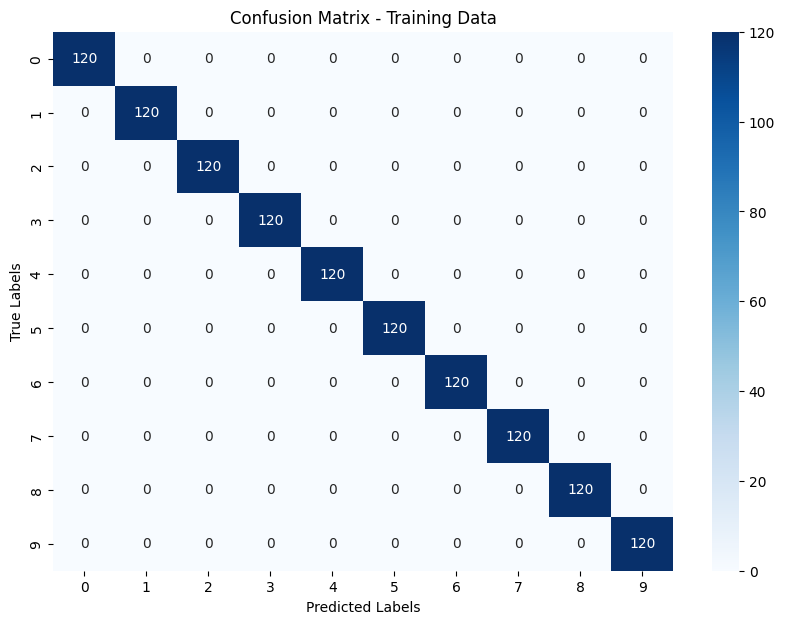

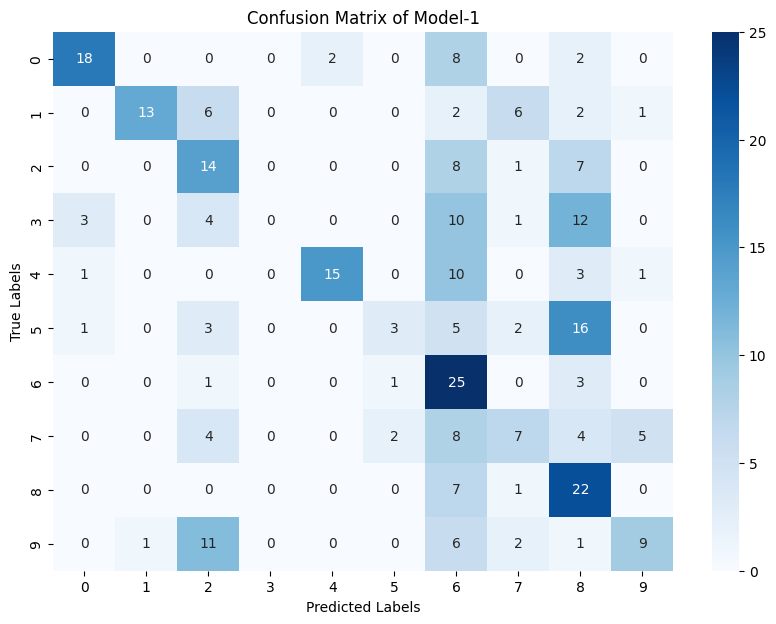

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist # Example dataset
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, Add
from tensorflow.keras.models import Model
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define the Residual Block
def residual_block(input_tensor, filters, strides=(1, 1)):
    shortcut = input_tensor

    # First convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=strides, padding='same')(input_tensor)
    x = Activation('relu')(x)

    # Second convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), strides=(1, 1), padding='same')(x)

    # If dimensions change, adjust shortcut
    if strides != (1, 1) or shortcut.shape[-1] != filters:
        shortcut = Conv2D(filters, kernel_size=(1, 1), strides=strides, padding='valid')(shortcut)

    x = Add()([x, shortcut])
    x = Activation('relu')(x)

    return x

# Define the ResNet model without the last layer
def create_resnet_base(input_shape):
    inputs = Input(shape=input_shape)
    x = Conv2D(64, (7, 7), strides=2, activation='relu', padding='same')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Residual blocks
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=128, strides=(2, 2))
    x = residual_block(x, filters=128)
    x = residual_block(x, filters=256, strides=(2, 2))
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=512, strides=(2, 2))
    x = residual_block(x, filters=512)

    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the ResNet base model
resnet_base_model = create_resnet_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = resnet_base_model.predict(X_train)
X_test_features = resnet_base_model.predict(X_test)

# Train SVM classifier
svm_classifier = SVC(kernel='linear')
pipeline1 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_classifier", svm_classifier)
])
pipeline1.fit(X_train_features, np.argmax(y_train, axis=1))

# Evaluate performance on training set
y_train_pred = pipeline1.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline1.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')


from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix for training data
train_cm = confusion_matrix(np.argmax(y_train, axis=1), y_train_pred)

# Compute confusion matrix for testing data
test_cm = confusion_matrix(np.argmax(y_test, axis=1), y_test_pred)

# Plot confusion matrix for training data
plt.figure(figsize=(10, 7))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot confusion matrix for testing data
plt.figure(figsize=(10, 7))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of Model-1')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



## Confusion Matrix-Inceptio-v3+RF

38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 95ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step
Training Accuracy: 100.0 %
Training Precision: 100.0 %
Training Recall: 100.0 %
Training F1 Score: 100.0 %
Testing Accuracy: 45.33333333333333 %
Testing Precision: 52.07506462795505 %
Testing Recall: 45.33333333333333 %
Testing F1 Score: 44.67250356226244 %


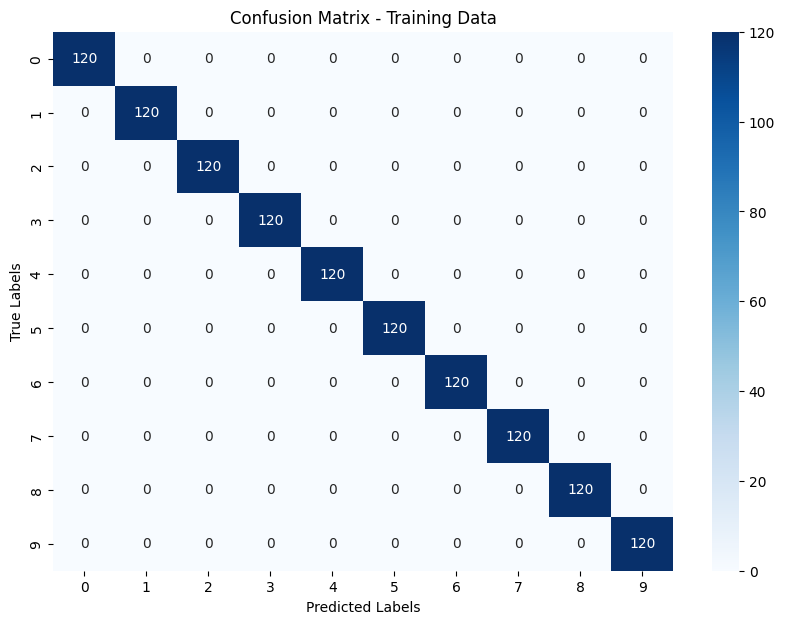

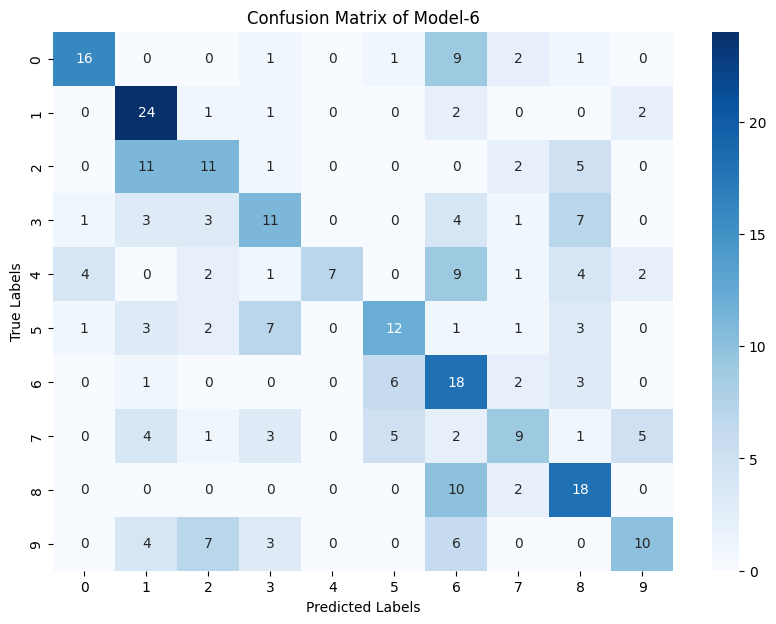

In [20]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, concatenate, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the Inception module
def inception_module(x, filters):
    branch1x1 = Conv2D(filters=filters[0], kernel_size=(1, 1), padding='same', activation='relu')(x)

    branch3x3 = Conv2D(filters=filters[1], kernel_size=(1, 1), padding='same', activation='relu')(x)
    branch3x3 = Conv2D(filters=filters[2], kernel_size=(3, 3), padding='same', activation='relu')(branch3x3)

    branch5x5 = Conv2D(filters=filters[3], kernel_size=(1, 1), padding='same', activation='relu')(x)
    branch5x5 = Conv2D(filters=filters[4], kernel_size=(5, 5), padding='same', activation='relu')(branch5x5)

    branch_pool = MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = Conv2D(filters=filters[5], kernel_size=(1, 1), padding='same', activation='relu')(branch_pool)

    output = concatenate([branch1x1, branch3x3, branch5x5, branch_pool], axis=-1)
    return output

# Define the Inception-V3 model without the last layer
def create_inception_v3_base(input_shape):
    inputs = Input(shape=input_shape)

    # Initial convolutional layer
    x = Conv2D(64, kernel_size=(7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Inception blocks
    x = inception_module(x, filters=[64, 96, 128, 16, 32, 32])
    x = inception_module(x, filters=[128, 128, 192, 32, 96, 64])
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Flatten and fully connected layers
    x = Flatten()(x)

    model = Model(inputs=inputs, outputs=x)
    return model

# Create the Inception-V3 base model
inception_v3_base_model = create_inception_v3_base(input_shape=(100, 100, 1))

# Extract features
X_train_features = inception_v3_base_model.predict(X_train)
X_test_features = inception_v3_base_model.predict(X_test)

# Train Random Forest classifier
random_forest_classifier21 = RandomForestClassifier(n_estimators=1000, max_depth=20, random_state=42)
pipeline21 = Pipeline([
    ("scaler", StandardScaler()),
    ("random_forest_classifier", random_forest_classifier21)
])
pipeline21.fit(X_train_features, np.argmax(y_train, axis=1))

# Evaluate performance on training set
y_train_pred = pipeline21.predict(X_train_features)
train_accuracy = accuracy_score(np.argmax(y_train, axis=1), y_train_pred)
train_precision = precision_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_recall = recall_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')
train_f1 = f1_score(np.argmax(y_train, axis=1), y_train_pred, average='weighted')

print("Training Accuracy:", train_accuracy*100,'%')
print("Training Precision:", train_precision*100,'%')
print("Training Recall:", train_recall*100,'%')
print("Training F1 Score:", train_f1*100,'%')

# Evaluate performance on testing set
y_test_pred = pipeline21.predict(X_test_features)
test_accuracy = accuracy_score(np.argmax(y_test, axis=1), y_test_pred)
test_precision = precision_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_recall = recall_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')
test_f1 = f1_score(np.argmax(y_test, axis=1), y_test_pred, average='weighted')

print("Testing Accuracy:", test_accuracy*100,'%')
print("Testing Precision:", test_precision*100,'%')
print("Testing Recall:", test_recall*100,'%')
print("Testing F1 Score:", test_f1*100,'%')

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix for training data
train_cm = confusion_matrix(np.argmax(y_train, axis=1), y_train_pred)

# Compute confusion matrix for testing data
test_cm = confusion_matrix(np.argmax(y_test, axis=1), y_test_pred)

# Plot confusion matrix for training data
plt.figure(figsize=(10, 7))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Training Data')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Plot confusion matrix for testing data
plt.figure(figsize=(10, 7))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix of Model-6')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
